# *BANK CUSTOMER DECISION USING ARTIFICIAL NEURAL NETWORK*

## *BY SRIKAR SEETHIRAJU*

## Aim : Predicting if the Bank Customer closes the bank account using data from CSV file.

## Method of approach used : ARTIFICIAL NEURAL NETWORK

- STEP #1: IMPORTING DATA
- STEP #2: DATA PREPROCESSING
- STEP #3: MODEL TRAINING
- STEP #4: EVALUATING THE MODEL

---

# STEP #1: IMPORTING DATA

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [2]:
dataset = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

---

# STEP #2: DATA PREPROCESSING

### Label Encoding the "Gender" column

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

### One Hot Encoding the "Geography" column

In [5]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

### Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Feature Scaling

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

---

# STEP #3: MODEL TRAINING

### Importing TENSORFLOW

In [8]:
from tensorflow.keras import models, layers

### Initializing the ANN

In [9]:
# Initializing the ANN
ann = models.Sequential()

# Adding the input layer and the first hidden layer
ann.add(layers.Dense(units=6, activation='relu'))

# Adding the second hidden layer
ann.add(layers.Dense(units=6, activation='relu'))

# Adding the output layer
ann.add(layers.Dense(units=1, activation='sigmoid'))

### Training the ANN

In [10]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
ann.fit(X_train, y_train, batch_size = 32, epochs = 50)

Epoch 1/50
250/250 [==============================] - 1s 1ms/step - loss: 0.5814 - accuracy: 0.7704
Epoch 2/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.7960
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4474 - accuracy: 0.7966
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.7971
Epoch 5/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4301 - accuracy: 0.8018
Epoch 6/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.8060
Epoch 7/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4225 - accuracy: 0.8104
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4197 - accuracy: 0.8106
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4169 - accuracy: 0.8129
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8154

---

# STEP #4: EVALUATING THE MODEL

### Predicting the result of a single observation

Using our ANN model to predict if the customer with the following informations will leave the bank: (In Order) 

- Credit Score: 600
- Geography: France
- Gender: Male
- Age: 40 years old
- Tenure: 3 years
- Balance: 60000
- Number of Products: 2
- Does this customer have a credit card ? Yes
- Is this customer an Active Member: Yes
- Estimated Salary: 50000

In [11]:
Z = sc.transform(ct.transform([[600, "France", le.transform([["Male"]]), 40, 3, 60000, 2, 1, 1, 50000]]))
print(ann.predict(Z) > 0.5)

[[False]]


C:\ProgramData\Anaconda3.0\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*OUR MODEL PREDICTED THAT THE CUSTOMER WILL NOT CLOSE HIS/ HER ACCOUNT.*

### Predicting the Test set results

In [12]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1532   63]
 [ 207  198]]


### Accuracy score

In [14]:
accuracy_score(y_test, y_pred)

0.865

### Heat map visualisation

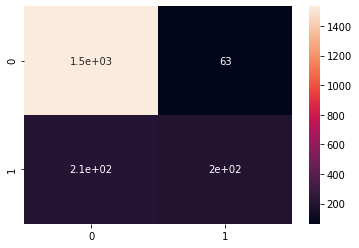

In [15]:
sns.heatmap(cm, annot=True)

---

# *END OF PROJECT*

---